# Estadística Descriptiva

>Este tutorial es una adaptación al español del material [Statistical Thinking for the 21st Century](https://statsthinking21.github.io/statsthinking21-core-site/) desarrollado por Russell Poldrack. 

- Mediante la estadística descriptiva se agrupan datos numéricos: se pierde información detallada pero se gana en síntesis.
- Permite describir a un conjunto de datos correspondientes a una característica o propiedad de un conjunto de objetos indicando la tendencia central y la dispersión de los datos.
- La tendencia central permite representar al conjunto de datos.
- La dispersión permite representar la variabilidad de los datos.

## Resumiendo datos con la media

Ya nos hemos encontrado con la media (o el promedio) anteriormente y, de hecho, la mayoría de las personas conocen el promedio incluso si nunca han tomado una clase de estadística. 

Se usa comúnmente para describir lo que llamamos la "tendencia central" de un conjunto de datos, es decir, ¿en qué valor se centran los datos? **La mayoría de la gente no piensa en calcular una media como ajustar un modelo a los datos**. Sin embargo, eso es exactamente lo que estamos haciendo cuando calculamos la media.

Repasemos la fórmula para calcular la media de una muestra de datos:

$$ \bar{X}=\frac{\sum_{i=1}^{n}x_{i}}{n} $$

Tenga en cuenta que dije que esta fórmula era específicamente para una **muestra de datos**, que es un conjunto de puntos de datos seleccionados de una población más grande. 

**Utilizando una muestra, deseamos caracterizar una población más grande**: el conjunto completo de individuos que nos interesan. Por ejemplo, si somos encuestadores políticos, nuestra población de interés podría ser todos votantes registrados, mientras que nuestra muestra podría incluir solo unos pocos miles de personas muestreadas de esta población. 

De momento no cubriremos a detalle sobre el muestreo, pero por ahora el punto importante es que **a los estadísticos generalmente les gusta usar diferentes símbolos para diferenciar las estadísticas que describen los valores de una muestra de los parámetros que describen los valores verdaderos de una población**; en este caso, la fórmula para la media poblacional (denotada como $\mu$) es:

$$ \mu=\frac{\sum_{i=1}^{n}x_{i}}{N} $$

donde N es el tamaño de toda la población.

La mayoría de las medidas de tendencia central se pueden calcular utilizando alguna función de Python, pero mostraremos cómo hacerlo manualmente para dar algo de intuición sobre cómo funcionan. Primero carguemos los datos de NHANES que usaremos para nuestros ejemplos:

In [2]:
!pip install nhanes

     |████████████████████████████████| 1.6 MB 561 kB/s 


In [ ]:
from nhanes.load import load_NHANES_data

nhanes_data = load_NHANES_data()
adult_nhanes_data = nhanes_data.query("AgeInYearsAtScreening > 17")

Dado que analizaremos la variable `StandingHeightCm`, debemos excluir cualquier observación a la que le falte esta medida. También recodificaremos la variable para que se llame `Height` para simplificar la codificación más adelante.

In [3]:
adult_nhanes_data = adult_nhanes_data.dropna(
    subset=["StandingHeightCm"]
).rename(columns={"StandingHeightCm": "Height"})

La media se define como la suma de valores dividida por el número de valores que se suman. Supongamos que queremos obtener la altura media de los adultos en la base de datos de NHANES (contenida en los datos de Altura que generamos anteriormente). Sumaríamos las alturas individuales (usando el operador `.sum()`) y luego dividiríamos por el número de valores:

In [4]:
adult_nhanes_data["Height"].sum() / adult_nhanes_data["Height"].shape[0]

166.3623438648053

Por supuesto, hay un operador incorporado en el Data Frame llamado `.mean()` que calculará la media:

In [5]:
adult_nhanes_data["Height"].mean()

166.36234386480572

Ya hemos visto que la media es el estimador que está garantizado para darnos un error promedio de cero, pero también aprendimos que el error promedio no es el mejor criterio; en cambio, **queremos un estimador que nos dé la suma más baja de errores al cuadrado (SSE), que también lo hace la media**. 

Podríamos probar esto usando cálculo, pero en su lugar lo demostraremos gráficamente:

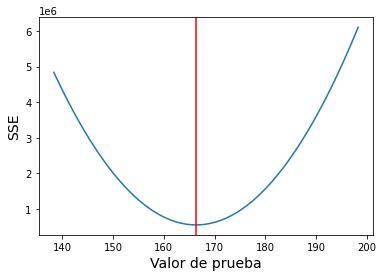

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Creamos una función para calcular el SSE
def sse(pred, data):
    squared_errors = (data - pred) ** 2
    return np.sum(squared_errors)


# Generamos los valores a someter a prueba
vals = np.arange(
    adult_nhanes_data["Height"].min(), adult_nhanes_data["Height"].max() + 1
)

# Calculamos el SSE para cada uno de los valores
sse_sweep = np.zeros(len(vals))
for i in np.arange(len(vals)):
    sse_sweep[i] = sse(vals[i], adult_nhanes_data["Height"])

# Graficamos nuestros resultados
plt.plot(vals, sse_sweep)
plt.axvline(x=adult_nhanes_data["Height"].mean(), color="r")
plt.xlabel("Valor de prueba", size=14)
plt.ylabel("SSE", size=14);

El gráfico muestra cómo **la media es un estadístico que minimiza la suma de errores cuadrados**. Utilizando los datos de altura de los adultos de NHANES, calculamos la media (barra roja). Luego, probamos un rango de posibles estimaciones de parámetros, y para cada uno calculamos la suma de los errores al cuadrado (curva azul). Vemos que la media cae al mínimo de la gráfica de error al cuadrado.

Esta minimización de SSE es una buena característica y es por eso que **la media es la estadística más utilizada para resumir datos**. Sin embargo, la media también tiene un lado oscuro. Supongamos que hay cinco personas en un bar y examinamos los ingresos de cada uno:

| Ingresos 	| Persona  	|
|----------	|----------	|
| 48000    	| Juan     	|
| 64000    	| Karen    	|
| 58000    	| Marco    	|
| 72000    	| Andrea   	|
| 66000    	| Patricio 	|

La media (61600,00) parece ser un resumen bastante bueno de los ingresos de esas cinco personas. Ahora veamos qué sucede si César Amuña entra al bar.


| Ingresos 	| Persona  	|
|----------	|----------	|
| 48000    	| Juan     	|
| 64000    	| Karen    	|
| 58000    	| Marco    	|
| 72000    	| Andrea   	|
| 66000    	| Patricio 	|
| 54000000 	| César    	|

La media ahora es de casi 10 millones, que no es realmente representativa de ninguna de las personas en el bar; en particular, está fuertemente impulsada por el valor periférico de César. En general, **la media es muy sensible a los valores extremos, por lo que siempre es importante asegurarse de que no haya valores extremos cuando se utiliza la media para resumir los datos**.

## Resumiendo datos de manera robusta utilizando la mediana

Si queremos **resumir los datos de una manera que sea menos sensible a los valores atípicos**, podemos usar otra estadística llamada mediana. 

Si tuviéramos que ordenar todos los valores en orden de magnitud, entonces **la mediana es el valor en el medio**. Si hay un número par de valores, habrá dos valores empatados para el lugar medio, en cuyo caso tomamos la media (es decir, el punto medio) de esos dos números.

Procedamos a implementar la mediana. Primero ordenamos los datos según sus valores:

In [7]:
height_sorted = adult_nhanes_data["Height"].sort_values()

A continuación, encontramos el valor mediano. Si hay un número impar de valores en la lista, entonces este es solo el valor del medio, mientras que si el número de valores es par, tomamos el promedio de los dos valores del medio. Podemos determinar si el número de elementos es par dividiendo la longitud por dos y viendo si queda un resto; hacemos esto usando el operador `%`, que se conoce como módulo y devuelve el resto:

In [8]:
height_length_mod_2 = height_sorted.shape[0] % 2
print(height_length_mod_2)

0


Aquí probaremos si el resto es igual a uno; si es así, tomaremos el valor medio, de lo contrario, tomaremos el promedio de los dos valores medios. Podemos hacer esto usando una estructura if/else, que ejecuta diferentes procesos dependiendo de cuál de los argumentos sea verdadero. A continuación, se muestra un ejemplo sencillo:

In [9]:
if 1 > 2:
    print("1 > 2")
else:
    print("1 no es mayor a dos 2!")

1 no es mayor a dos 2!


Para nuestro ejemplo, podemos usar una declaración if para determinar cómo calcular la mediana, dependiendo de si hay un número par o impar de puntos de datos.

In [10]:
if height_length_mod_2 == 1:
    # valores impares - toma el punto medio único
    midpoint = int(np.ceil(height_sorted.shape[0] / 2))
    median = height_sorted[midpoint]
else:
    # valores pares - necesita promediar los dos puntos medios
    midpoints = [
        int((height_sorted.shape[0] / 2) - 1),
        int(height_sorted.shape[0] / 2),
    ]
    median = height_sorted.iloc[midpoints].mean()

print(median)

165.9


Están sucediendo muchas cosas allí, así que vamos a desmenuzarlo. La primera línea de la instrucción `if` pregunta si el resto es igual a uno; si es así, ejecuta las líneas que están sangradas debajo. Python usa la sangría como parte de su sintaxis, por lo que siempre debe tener mucho cuidado con la sangría. 

Si el resto es uno, eso significa que el número de observaciones es impar y, por lo tanto, podemos simplemente tomar el punto medio. Determinamos esto dividiendo el número de observaciones por dos y luego redondeando hacia arriba (que es lo que hace la función `np.ceil()`). 

Finalmente, tenemos que convertir este número en un entero usando la función `int()`, ya que solo podemos usar enteros para indexar un marco de datos.

Si la primera prueba es falsa, es decir, si el resto es cero, la segunda sección de código (después de la instrucción `else`) se ejecutará en su lugar. Aquí necesitamos encontrar los dos puntos medios y promediarlos, por lo que creamos una nueva lista que contiene esos dos puntos, y luego usamos ese índice de nuestros datos y luego tomamos la media.

Por supuesto, también hay un operador incorporado en el Data Frame llamado `.median()` que calculará la media:

In [11]:
adult_nhanes_data["Height"].median()

165.9

Mientras que la media minimiza la suma de los errores cuadrados, **la mediana minimiza una cantidad ligeramente diferente: la suma del valor absoluto de los errores**. 

Esto explica por qué es menos sensible a los valores atípicos: **la cuadratura exacerbará el efecto de los errores grandes en comparación con tomar el valor absoluto**. 

Podemos ver esto en el caso del ejemplo de los ingresos: el ingreso mediano (65,000) es mucho más representativo del grupo en su conjunto que la media (9,051,333) y menos sensible al valor atípico grande.

Dado esto, ¿por qué usaríamos la media? La media es el "mejor" estimador en el sentido de que variará menos de una muestra a otra en comparación con otros estimadores. Depende de nosotros decidir si vale la pena la sensibilidad a posibles valores atípicos: las estadísticas se tratan de compensaciones (tradeoffs).

## La moda

La moda es el valor más frecuente que ocurre en una variable.

Por ejemplo, digamos que tenemos los siguientes datos:

In [12]:
import pandas as pd

toy_data = pd.DataFrame({"myvar": ["a", "a", "b", "c"]})

Podemos ver a simple vista que el modo es “a” ya que ocurre con más frecuencia que los demás. Para encontrarlo computacionalmente, usemos el operador `.value_counts()` para encontrar la frecuencia de cada valor:

In [13]:
myvar_frequencies = toy_data["myvar"].value_counts()
myvar_frequencies

a    2
b    1
c    1
Name: myvar, dtype: int64

Ahora busquemos la frecuencia más alta, usando el operador `.max ()`:

In [14]:
max_frequency = myvar_frequencies.max()
max_frequency

2

Ahora podemos encontrar los valores que tienen la frecuencia máxima:

In [15]:
mode = myvar_frequencies.loc[myvar_frequencies == max_frequency].index.values
print(mode)

['a']


Ttambién hay un operador incorporado en el Data Frame llamado `.mode()` que calculará la moda:

In [16]:
toy_data.mode()

,myvar
0,a


In [17]:
adult_nhanes_data["Height"].mode()

0    161.4
dtype: float64

## Variabilidad: ¿Qué tan bien se ajusta la media a los datos?

Una vez que hemos descrito la tendencia central de los datos, a menudo **también queremos describir cuán variables son los datos**; esto a veces también se denomina "dispersión", lo que refleja el hecho de que describe cuán ampliamente dispersos están los datos.

Ya hemos encontrado la suma de los errores cuadrados arriba, que es la base para las medidas de variabilidad más comúnmente utilizadas: **la varianza y la desviación estándar**. 

La **varianza de una población** (a la que se hace referencia como $\sigma^{2}$) es simplemente la suma de los errores cuadrados dividida por el número de observaciones. Es decir, **es exactamente igual que el error cuadrático medio** que revisamos anteriormente:

$$ \sigma^{2} = \frac{SSE}{N} = \frac{\sum_{i=1}^{n}(x_{i}-\mu)^{2}}{N} $$

donde $\mu$ es la media de la población. 

La **desviación estándar de la población** es simplemente la raíz cuadrada de esto. Es decir, **la raíz del error cuadrático medio** que vimos antes. La desviación estándar es útil porque los errores están en las mismas unidades que los datos originales (deshaciendo el cuadrado que aplicamos a los errores).

Por lo general, no tenemos acceso a toda la población, por lo que tenemos que **calcular la varianza utilizando una muestra**, a la que nos referimos como $\hat\sigma^{2}$, donde el "sombrero" representa el hecho de que se trata de una estimación basada en una muestra. La ecuación para $\hat\sigma^{2}$ es similar a la de $\sigma^{2}$:

$$ \hat\sigma^{2}=\frac{\sum_{i=1}^{n}(x_{i}-\bar{X})^{2}}{n-1} $$

La única diferencia entre las dos ecuaciones es que **dividimos por $n-1$ en lugar de $N$**. Esto se relaciona con un concepto estadístico fundamental: **grados de libertad**. Recuerde que para calcular la varianza muestral, primero tuvimos que estimar la media muestral $\bar{X}$. Habiendo estimado esto, un valor en los datos ya no puede **variar libremente**. 

Por ejemplo, digamos que tenemos los siguientes puntos de datos para una variable `x:[3, 5, 7, 9, 11]`, cuya media es 7. Como sabemos que la media de este conjunto de datos es 7, podemos calcular cuál sería cualquier valor específico si faltara. Por ejemplo, digamos que ocultáramos el primer valor (3). Una vez hecho esto, todavía sabemos que su valor debe ser 3, porque la media de 7 implica que la suma de todos los valores es `7 ∗ n = 35` y `35 − (5 + 7 + 9 + 11) = 3`.

Entonces, **cuando decimos que hemos “perdido” un grado de libertad, significa que hay un valor que no puede variar libremente después de ajustar el modelo**. En el contexto de la varianza de la muestra, si no tenemos en cuenta el grado de libertad perdido, entonces nuestra estimación de la varianza de la muestra estará sesgada, lo que nos hará subestimar la incertidumbre de nuestra estimación de la media.

### Usemos simulaciones para entender estos conceptos

Primero calculemos la varianza, que es la diferencia cuadrática promedio entre cada valor y la media. Hagamos esto con nuestra versión limpia de los datos de altura, pero en lugar de trabajar con el conjunto de datos completo, tomemos una muestra aleatoria de 150 personas:

In [18]:
sample_size = 150
height_sample = adult_nhanes_data.sample(sample_size)["Height"]

Simplemente podríamos haber ingresado el número 150 en la función de muestra, pero al crear primero una nueva variable llamada `sample_size` y establecerla en 150, le aclaramos al lector del código exactamente a qué se refiere este número. Siempre es una buena práctica crear una nueva variable en lugar de escribir un número directamente en una fórmula.

Para calcular la varianza que necesitamos, primero debemos calcular la suma de los errores cuadrados a partir de la media. En Python, podemos cuadrar un vector usando `** 2`:

In [19]:
sum_of_squared_errors = np.sum((height_sample - height_sample.mean()) ** 2)

Luego dividimos por N - 1 para obtener la varianza estimada:

In [20]:
variance_estimate = sum_of_squared_errors / (height_sample.shape[0] - 1)
variance_estimate

114.03124161073825

Tratemos la muestra completa de adultos de los datos de NHANES como nuestra "población", y veamos qué tan bien los cálculos de la varianza de la muestra usando $n$ o $n−1$ en el denominador estimarán la varianza de esta población, a través de una gran cantidad de muestras aleatorias simuladas a partir de los datos:

In [21]:
# Definimos los parámetros para nuestra simulación
n_sims = 1000
estimates = np.zeros((n_sims, 2))
sample_size = 75

# Simulamos muestreos y para cada uno calculamos nuestras estimaciones
for i in range(n_sims):
    height_sample = adult_nhanes_data.sample(sample_size)["Height"]
    sum_of_squared_errors = np.sum((height_sample - height_sample.mean()) ** 2)
    variance_estimate_n = sum_of_squared_errors / (
        height_sample.shape[0]
    )  # Usando n
    variance_estimate_n1 = sum_of_squared_errors / (
        height_sample.shape[0] - 1
    )  # Usando n-1
    estimates[i, :] = [variance_estimate_n, variance_estimate_n1]

# Mostramos los resultados de nuestra simulación
print("Estimación de la varianza utilizando n:", np.mean(estimates[:, 0]))
print("Estimación de la varianza utilizando n-1:", np.mean(estimates[:, 1]))

Estimación de la varianza utilizando n: 99.6841998471111
Estimación de la varianza utilizando n-1: 101.03128362882882


Ahora comparemos estos valores con la varianza de la población:

In [22]:
height_population = adult_nhanes_data["Height"]
sum_of_squared_errors = np.sum(
    (height_population - height_population.mean()) ** 2
)
variance = sum_of_squared_errors / (height_population.shape[0])
variance

101.32320729101488

Los resultados de la simulación nos muestran que la teoría descrita anteriormente era correcta: la estimación de la varianza usando $n−1$ como denominador está muy cerca de la varianza calculada sobre los datos completos (es decir, la población), mientras que la varianza calculada usando $n$ como el denominador está sesgado (más pequeño) en comparación con el valor real.

Podemos hacer los cálculos de la varianza y la desviación estándar de manera más sencilla con funciones integradas:

In [23]:
print("Varianza:", height_population.var())
print("Desviación estándar:", height_population.std())

Varianza: 101.34182261478672
Desviación estándar: 10.066867567162426


## Rango intercuartílico

Una medida de dispersión especialmente robusta a los valores extremos es el rango intercuartílico (IQR). Para calcularlo, primero encuentra la mediana (valor medio) de la mitad inferior y de la mitad superior de los datos. Estos valores son el primer cuartil (Q1 o percentil 25) y el tercer cuartil (Q3 o percentil 75). El IQR es la diferencia entre Q3 y Q1.

En nuestro ejemplo, podemos implementarlo de la siguiente manera:

In [24]:
iqr = height_population.quantile(0.75) - height_population.quantile(0.25)
print("Rango intercuartílico:", iqr)

Rango intercuartílico: 14.699999999999989


## Forma de la distribución

La asimetría es un parámetro para medir la simetría de un conjunto de datos. Por su parte, la curtosis sirve para medir qué tan pesadas son sus colas en comparación con una distribución normal. Veamos un ejemplo a partir de una simulación:

media :  15.16716917293863
varianza  :  168.80795267381808
asimetría :  0.5990255705797467
curtosis :  0.2950522826273483


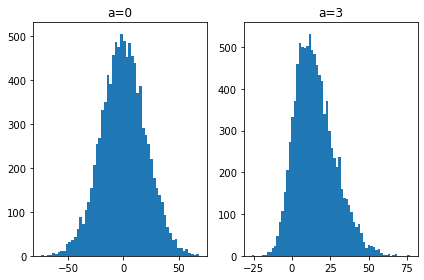

In [25]:
from scipy.stats import kurtosis, skew, skewnorm

# Definimos los parámetros de la simulación
n = 10000
start = 0
width = 20

# Simulamos distribuciones con diferentes parámetros de asimetría "a"
a = 0
data_normal = skewnorm.rvs(size=n, a=a, loc=start, scale=width)

a = 3
data_skew = skewnorm.rvs(size=n, a=a, loc=start, scale=width)

# Generamos los gráficos
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(data_normal, bins="auto")
ax1.set_title("a=0")
ax2.hist(data_skew, bins="auto")
ax2.set_title("a=3")
plt.tight_layout()

sig1 = data_skew
print("media : ", np.mean(sig1))
print("varianza  : ", np.var(sig1))
print("asimetría : ", skew(sig1))
print("curtosis : ", kurtosis(sig1))

# Estadística Inferencial 

## ¿Qué es la estadística inferencial?

- Permite **obtener información de características de una población a partir de muestras**.
- Muestra debe ser lo suficientemente grande y representativa.

- Por población nos referimos a la **población de valores un atributo** (p.e. población de tallas, población de pesos, población de coeficiente intelectual, etc.)
- En investigaciones psicológicas con seres humanos, usualmente **un individuo de una población alberga múltiples atributos de interés**.
- Población de valores de un atributo ≠ Población de personas.

## Prueba de hipótesis

Podemos dividir el proceso de prueba de hipótesis en varios pasos:

1. Formular una hipótesis que encarne nuestra predicción (antes de ver los datos)
2. Especificar hipótesis nulas y alternas


3. Recopilar algunos datos relevantes para la hipótesis.
4. Ajustar un modelo a los datos que representan la hipótesis alternativa y calcular una estadística de prueba
5. Calcular la probabilidad del valor observado de ese estadístico asumiendo que la hipótesis nula es verdadera
6. Evaluar la "significación estadística" del resultado

Por ejemplo, usemos los datos de NHANES para hacer la siguiente pregunta: ¿La actividad física está relacionada con el índice de masa corporal? 

En el conjunto de datos de NHANES, se preguntó a los participantes si participaban regularmente en deportes, fitness o actividades recreativas de intensidad moderada o vigorosa (almacenados en la variable `WalkOrBicycle`). 

Los investigadores también midieron la altura y el peso y los utilizaron para calcular el índice de masa corporal (IMC):

$$ IMC = \frac{Peso (kg)}{Altura (m)^{2}} $$

### Paso 1: Formular una hipótesis de interés

Planteamos la hipótesis de que el IMC es mayor para las personas que no realizan actividad física, en comparación con las que sí hacen.

### Paso 2: Especificar hipótesis nulas y alternas

Para el paso 2, necesitamos especificar nuestra hipótesis nula (que llamamos $H_{0}$) y nuestra hipótesis alternativa (que llamamos $H_{1}$).

**$H_{0}$ es la línea de base** contra la cual probamos nuestra hipótesis de interés: es decir, ¿cómo esperaríamos que se vean los datos si no hubiera ningún efecto? La hipótesis nula siempre **implica algún tipo de igualdad** (=, ≤ o ≥).

**$H_{1}$ describe lo que esperamos** si realmente hay un efecto. La hipótesis alternativa siempre **implica algún tipo de desigualdad** (≠, > o <). 

Es importante destacar que la prueba de hipótesis opera bajo el supuesto de que **la hipótesis nula es verdadera a menos que la evidencia demuestre lo contrario**.

También tenemos que decidir si queremos probar una hipótesis direccional o no direccional. 

Una **hipótesis no direccional simplemente predice que habrá una diferencia**, sin predecir en qué dirección irá. Para el ejemplo de IMC/actividad, una hipótesis nula no direccional sería:

$$ H_{0}: IMC_{activo} = IMC_{inactivo} $$

y la hipótesis alternativa no direccional correspondiente sería:

$$ H_{1}: IMC_{activo} \neq  IMC_{inactivo} $$

Una **hipótesis direccional predice en qué dirección iría la diferencia.** 

Por ejemplo, tenemos un conocimiento previo sólido para predecir que las personas que realizan actividad física deben pesar menos que las que no, por lo que propondríamos la siguiente hipótesis nula direccional:

$$ H_{0}: IMC_{activo} \geq IMC_{inactivo} $$

y la alterna direccional:

$$ H_{1}: IMC_{activo} < IMC_{inactivo} $$

**Probar una hipótesis no direccional** es más conservador, por lo que **generalmente se prefiere a menos que exista una fuerte razón a priori para hipotetizar un efecto en una dirección particular**. 

Las hipótesis, sean direccionales o no, **siempre deben especificarse antes de mirar los datos.**


### Paso 3: Recolectar algunos datos

En este caso, muestrearemos 150 individuos del conjunto de datos de NHANES. El gráfico muestra un ejemplo de tal muestra, con el IMC mostrado por separado para individuos activos e inactivos, y la tabla muestra estadísticas resumidas para cada grupo:

In [26]:
sample_size = 150
bmi_sample = adult_nhanes_data.sample(sample_size, random_state=100)[
    ["BodyMassIndexKgm2", "WalkOrBicycle"]
]
bmi_sample.groupby("WalkOrBicycle").agg(["count", "mean", "std"])

BodyMassIndexKgm2                     
                          count       mean       std
WalkOrBicycle                                       
0.0                         111  30.613514  7.383353
1.0                          39  27.258974  5.931127

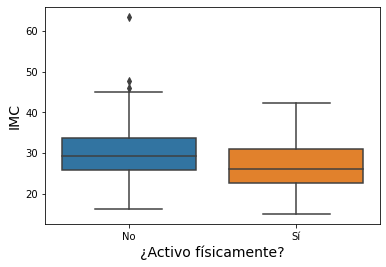

In [27]:
import seaborn as sns

sns.boxplot(x="WalkOrBicycle", y="BodyMassIndexKgm2", data=bmi_sample)
plt.xlabel("¿Activo físicamente?", size=14)
plt.xticks([0, 1], ["No", "Sí"])
plt.ylabel("IMC", size=14);

### Paso 4: Ajustar un modelo a los datos y calcular un estadístico de prueba

A continuación, **queremos usar los datos para calcular una estadística que finalmente nos permitirá decidir si la hipótesis nula se rechaza o no**. 

Para hacer esto, el modelo necesita cuantificar la cantidad de evidencia a favor de la hipótesis alterna, en relación con la variabilidad de los datos. 

Por tanto, **podemos pensar en el estadístico de prueba como una medida del tamaño del efecto en comparación con la variabilidad de los datos**. 

En general, este estadístico de prueba tendrá una distribución de probabilidad asociada, porque eso **nos permite determinar qué tan probable es nuestro valor observado del estadístico bajo la hipótesis nula**.

**Para el ejemplo del IMC, necesitamos un estadístico de prueba que nos permita probar la diferencia entre dos medias**, ya que las hipótesis se expresan en términos del IMC medio de cada grupo. 

Una estadística que se utiliza a menudo para comparar dos medias es la estadística $t$, desarrollada por primera vez por el estadístico William Sealy Gossett, quien trabajó para Guiness Brewery en Dublín y escribió bajo el seudónimo "Student"; por lo tanto, a menudo se llama *estadístico t de Student*. 

**El estadístico t es apropiado para comparar las medias de dos grupos cuando los tamaños de muestra son relativamente pequeños y se desconoce la desviación estándar de la población.** 

El estadístico t para la comparación de dos grupos independientes se calcula como:

$$ t=\frac{\bar{X}_{1}-\bar{X}_{2}}{\frac{S^{2}_{1}}{n_{1}} + \frac{S^{2}_{2}}{n_{2}}} $$

donde $\bar{X}_{1}$ y $\bar{X}_{2}$ son las medias de ambos grupos, $S^{2}_{1}$ y $S^{2}_{2}$ son las varianzas estimadas de los grupos, y $n_{1}$ y $n_{2}$ son los tamaños de ambos grupos. 

Porque la varianza de una diferencia entre dos variables es la suma de las varianzas de cada variable individual $ (var(A-B))=var(A) + var(B))$, sumamos las varianzas para cada grupo divididas por sus tamaños de muestra para calcular el error estándar de la diferencia. 

Por lo tanto, **se puede ver el estadístico $t$ como una forma de cuantificar qué tan grande es la diferencia entre grupos en relación con la variabilidad muestral de la diferencia entre medias.**

El estadístico $t$ se distribuye de acuerdo con una distribución de probabilidad conocida como **distribución t**. La distribución t se parece bastante a una distribución normal, pero difiere según el número de grados de libertad. 

Cuando los grados de libertad son grandes (digamos 1000), la distribución t se parece esencialmente a la distribución normal. Cuando son pequeños, la distribución t tiene colas más largas que la normal. 

**En el caso más simple**, donde los grupos son del mismo tamaño y tienen la misma varianza, **los grados de libertad para la prueba t son el número de observaciones menos 2**, ya que hemos calculado dos medias y, por lo tanto, hemos renunciado a dos grados de libertad. 

**En nuestro ejemplo**, está bastante claro a partir del diagrama de caja que el grupo inactivo es más variable que el grupo activo, y los números en cada grupo difieren, por lo que **debemos usar una fórmula un poco más compleja para los grados de libertad**, que a menudo se denomina como una "prueba t de Welch". 

La formula es:

$$ d.f. = \frac{ \left(\frac{S^{2}_{1}}{n_{1}}+\frac{S^{2}_{2}}{n_{2}}\right)^{2} }{\frac{\left ( \frac{S^{2}_{1}}{n_{1}} \right )^{2} }{n_{1}-1} +  \frac{\left ( \frac{S^{2}_{2}}{n_{2}} \right )^{2} }{n_{2}-1}                 } $$


Esto será igual a $ n_{1}+n_{2}-2 $ cuando las varianzas y los tamaños de la muestra sean iguales. De lo contrario será más pequeño, imponiendo de hecho una **penalización en la prueba por diferencias en el tamaño o varianza de la muestra**.

### Paso 5: Determinar la probabilidad del resultado observado bajo la hipótesis nula

Este es el paso en el que la prueba de hipótesis comienza a violar nuestra intuición. 

En lugar de determinar la probabilidad de que la hipótesis nula sea verdadera dados los datos, en cambio, **determinamos la probabilidad de observar una estadística al menos tan extrema como la que hemos observado bajo la hipótesis nula** - ¡porque comenzamos asumiendo que la hipótesis nula es cierta! 

Para hacer esto, necesitamos **conocer la distribución de probabilidad esperada para el estadístico bajo la hipótesis nula**, de modo que podamos preguntarnos **qué tan probable sería el resultado bajo esa distribución**. 

Ten en cuenta que cuando decimos "qué tan probable sería el resultado", lo que realmente queremos decir es **"qué tan probable sería el resultado observado o uno más extremo"**.  

Hay (al menos) dos razones por las que necesitamos agregar esta advertencia. La primera es que **cuando hablamos de valores continuos, la probabilidad de cualquier valor en particular es cero** (como recordará si has tomado una clase de cálculo). 

Más importante aún, estamos tratando de determinar qué tan extraño sería nuestro resultado si la hipótesis nula fuera cierta -y cualquier resultado que sea más extremo sería aún más extraño- por lo que **queremos contar todas esas posibilidades más extrañas cuando calculamos la probabilidad de nuestro resultado bajo la hipótesis nula**.


Podemos obtener esta "distribución nula" utilizando una distribución teórica (como la distribución t) o utilizando la aleatorización. Ahora implementemos una prueba t de student de Welch:

In [28]:
from scipy.stats import ttest_ind

# Generamos una variable por cada grupo a comparar
grupo1 = bmi_sample.query("WalkOrBicycle == 0")["BodyMassIndexKgm2"]
grupo2 = bmi_sample.query("WalkOrBicycle == 1")["BodyMassIndexKgm2"]

# Llamamos la función ttest_ind con el parámetro equal_var como Falso
ttest_ind(grupo1, grupo2, equal_var=False)

Ttest_indResult(statistic=2.8420917422087077, pvalue=0.005650248534570324)

### Paso 6: Evaluar la "significancia estadística" del resultado

El siguiente paso es determinar si el valor p que resulta del paso anterior es lo suficientemente pequeño como para que estemos dispuestos a rechazar la hipótesis nula y, en cambio, concluir que la alternativa es verdadera. 

¿Cuánta evidencia necesitamos? Esta es una de las preguntas más controvertidas en estadística, en parte porque requiere un juicio subjetivo: no hay una respuesta "correcta".

Históricamente, la respuesta más común a esta pregunta ha sido que **deberíamos rechazar la hipótesis nula si el valor p es menor que 0.05**. Esto proviene de los escritos de Ronald Fisher, a quien se ha referido como "la figura más importante de las estadísticas del siglo XX" (Efron 1998):

>“If P is between .1 and .9 there is certainly no reason to suspect the hypothesis tested. If it is below .02 it is strongly indicated that the hypothesis fails to account for the whole of the facts. We shall not often be astray if we draw a conventional line at .05 … it is convenient to draw the line at about the level at which we can say: Either there is something in the treatment, or a coincidence has occurred such as does not occur more than once in twenty trials” (Fisher 1925)

Sin embargo, **Fisher nunca pretendió que p <0.05 fuera una regla fija**:

>“no scientific worker has a fixed level of significance at which from year to year, and in all circumstances, he rejects hypotheses; he rather gives his mind to each particular case in the light of his evidence and his ideas” (Fisher 1956)

La elección de los umbrales estadísticos sigue siendo muy controvertida y recientemente (Benjamin et al., 2018) se ha propuesto que el umbral predeterminado se cambie de .05 a .005, lo que hace que sea sustancialmente más estricto y, por lo tanto, más difícil rechazar la hipótesis nula. 

En gran parte, este movimiento se debe a la creciente preocupación de que la evidencia obtenida de un resultado significativo en p <.05 sea relativamente débil.


#### Prueba de hipótesis como un proceso de toma de decisiones

Jerzy Neyman y Egon Pearson propusieron que pensemos en la prueba de hipótesis en términos de su tasa de error a largo plazo:

>“no test based upon a theory of probability can by itself provide any valuable evidence of the truth or falsehood of a hypothesis. But we may look at the purpose of tests from another viewpoint. Without hoping to know whether each separate hypothesis is true or false, we may search for rules to govern our behaviour with regard to them, in following which we insure that, in the long run of experience, we shall not often be wrong” (Neyman and Pearson 1933)

Es decir: no podemos saber qué decisiones específicas son correctas o incorrectas, pero si seguimos las reglas, al menos podemos saber con qué frecuencia nuestras decisiones serán incorrectas a largo plazo.

Para comprender el marco de toma de decisiones que desarrollaron Neyman y Pearson, primero debemos **analizar la toma de decisiones estadísticas en términos de los tipos de resultados que pueden ocurrir**. Hay dos estados posibles de la realidad (H0 es verdadera o H0 es falsa) y dos decisiones posibles (rechazar H0 o retener H0). 

Hay dos formas en las que podemos tomar una **decisión correcta**:
- Podemos rechazar H0 cuando es falsa (en el lenguaje de la teoría de detección de señales, llamamos a esto un acierto)
- Podemos retener H0 cuando es verdadera (algo confuso en este contexto, esto se llama un rechazo correcto)

También hay **dos tipos de errores** que podemos cometer:
- Podemos rechazar H0 cuando en realidad es cierta (a esto lo llamamos una falsa alarma o un **error de tipo I**)
- Podemos retener H0 cuando en realidad es falsa (a esto lo llamamos un error o **error de Tipo II**) 


Neyman y Pearson acuñaron dos términos para describir la probabilidad de estos dos tipos de errores a largo plazo:

- P(error tipo I) = $\alpha$
- P(error tipo II) = $\beta$
 
Es decir, si establecemos $\alpha$ en .05, a largo plazo deberíamos cometer un error de Tipo I el 5% de las veces. Mientras que es común establecer α como .05, el valor estándar para un nivel aceptable de $\beta$ es .20, es decir, estamos dispuestos a aceptar que el 20% de las veces no detectaremos un efecto verdadero cuando realmente existe.